In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy, pandas, datetime, matplotlib, & seaborn packages

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

### Data Sourcing and Data Cleaning ...

Read the loan data, inspect, clean and prepare the data ..

In [3]:
# Read the loan data in to a dataframe. 
loan = pd.read_csv('loan.csv', encoding = 'latin')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# inspect uber dataframe
print("*********************************  Info *******************************************") 
print(loan.info())
print("*********************************  Shape ******************************************") 
print(loan.shape)
print("**************************** Columns having null values *****************************")
print(loan.isnull().any())
print("**************************** Describe *****************************")
loan.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
*********************************  Shape ******************************************
(39717, 111)
**************************** Columns having null values *****************************
id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                          True
emp_length                         True
home_ownership                    False
annual_inc 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# check for columns that have 100% null values and remove them

columns = loan.columns
percent_missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_drop = list(missing_value_df[missing_value_df.percent_missing == 100.00].column_name)
loan = loan.drop(missing_drop, axis=1)
loan.shape

(39717, 57)

In [6]:
# The following columns are more on customer's information and hence we can remove the same

loan = loan.drop(['title', 'desc', 'url', 'emp_title', 'zip_code'], axis = 1)

In [7]:
# The following parameters are more into loan parameters which we would not be needing for our analysis. Hence we can remove them

loan = loan.drop(['last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'collection_recovery_fee', 'recoveries', 
                    'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_pymnt_inv', 'out_prncp', 
                      'out_prncp_inv'], axis = 1)

In [8]:
# Customer behavior attributes and certain other fields that we would not be using for analysis. Hence removing the same.

loan = loan.drop(['delinq_2yrs', 'total_acc', 'pub_rec', 'inq_last_6mths', 'earliest_cr_line', 'collections_12_mths_ex_med',
                  'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',  'tax_liens', 'installment', 
                  'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'total_pymnt', 'next_pymnt_d',
                  'initial_list_status', 'pub_rec_bankruptcies', 'policy_code', 'application_type', 'pymnt_plan', 'open_acc'], 
                 axis = 1)
loan.shape

(39717, 18)

In [9]:
# check for duplicate values by checking if the loan id is repeated

true_count = loan['id'].duplicated().sum()
print(true_count)

0


In [10]:
# Remove the loan id and member id columns as they would not be of any use for further analysis

loan = loan.drop(['id', 'member_id'], axis = 1)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [11]:
# Since we would only be analysing the scenario where there are more chances that a loan applicant will default, we can ignore
# the loans that are currently running and instead take the fully paid up loans and charged off (defaulted) loans for analysis.

loan = loan[loan.loan_status != 'Current']

In [12]:
# Check how many rows have null values

round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

In [13]:
# Remove the null rows from emp_length field as it is less than 5%

loan = loan.dropna(subset=['emp_length'])

In [14]:
# Check the types of purposes for which the loan has taken as this is one of the factor which we would use in our analysis

(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64

In [15]:
# Since we do not know what the term "others" stands for in the purpose we would get rid of it.

loan.drop(loan[loan.purpose == 'other'].index, inplace=True)

In [16]:
# convert the "term" column to int by removing the word months

loan['term'] = loan['term'].str.replace('months', '')
loan['term'] = loan['term'].astype(int)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [17]:
# Remove the % character in int rate and convert it to data type float

loan['int_rate'] = loan['int_rate'].str.replace('%', '')
loan['int_rate'] = loan['int_rate'].astype(float)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [18]:
# clean up the emp_length column and convert it to int
# would be treating 0 and <1 year as 0 as they all fall under less than 1 year category
# would be treating 10+ years as 10 which would mean 10 years and above

loan['emp_length'] = loan['emp_length'].str.replace('years', '')
loan['emp_length'] = loan['emp_length'].str.replace('< 1 year', '0')
loan['emp_length'] = loan['emp_length'].str.strip('+ ')
loan['emp_length'] = loan['emp_length'].str.replace('year', '')
loan['emp_length'] = loan['emp_length'].astype(int)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51


In [19]:
# Check the data spread in the annual_inc column

loan['annual_inc'].describe()

count    3.383100e+04
mean     7.003334e+04
std      6.596019e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [20]:
# There is a huge difference between the mean and the max values in the annual_inc column. Hence we need to remove the outliers 
# We will remove any value which is outside the 99.9% quartile

nn_quartile = loan['annual_inc'].quantile(0.99)
loan = loan[loan["annual_inc"] < nn_quartile]
loan["annual_inc"].describe()   

count     33492.000000
mean      66490.324304
std       35165.906151
min        4000.000000
25%       42000.000000
50%       60000.000000
75%       82000.000000
max      235000.000000
Name: annual_inc, dtype: float64

### Derived Metrics :

In [21]:
# Extract Year and month from Issue_Date to seperate columns

loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan['issue_year'] = '20'+ loan['issue_year']
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011


In [22]:
# create a new column for loan to income ratio

loan['loan_inc_ratio']= 100*(loan['loan_amnt']/loan['annual_inc'])
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350


In [23]:
# Get the 25%, 50% and 75% quartiles of the loan_inc_ratio column for categorisation

loan['loan_inc_ratio'].quantile([.25, .5, .75])

0.25    10.285714
0.50    16.666667
0.75    25.384615
Name: loan_inc_ratio, dtype: float64

In [24]:
# Categorise the loan_inc_ratio column into categorised_loan_inc_ratio column as follows :
# < 10 is Low
# Between 10 and 16 (both inclusive) is Medium
# 17 and 24 are High
# >= 25 is Very High

def loan_inc_ratio_category(n):
    if n < 10:
        return 'Low'
    elif n >=10 and n < 17:
        return 'Medium'
    elif n >= 17 and n < 25:
        return 'High'
    else:
        return 'Very High'
    
loan['categorised_loan_inc_ratio'] = loan['loan_inc_ratio'].apply(loan_inc_ratio_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium


In [25]:
# Get the 25%, 50% and 75% quartiles of the int_rate column for categorisation

loan['int_rate'].quantile([.25, .5, .75])

0.25     8.94
0.50    11.83
0.75    14.46
Name: int_rate, dtype: float64

In [26]:
# Categorise the int_rate column into categorised_int_rate_perc (percentage) column as follows :
# < 9% is Low
# Between 9% and 11% (both inclusive) is Medium
# 12% and 13% are High
# >= 14% is Very High

def interest_rates(n):
    if n < 9:
        return 'Low'
    elif n >=9 and n < 12:
        return 'Medium'
    elif n >= 12 and n < 14:
        return 'High'
    else:
        return 'Very High'
    
loan['categorised_int_rate_perc'] = loan['int_rate'].apply(interest_rates)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low,Very High
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High,Very High
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High


In [27]:
# Get the 25%, 50% and 75% quartiles of the emp_length column for categorisation

loan['emp_length'].quantile([.25, .5, .75])

0.25    2.0
0.50    4.0
0.75    9.0
Name: emp_length, dtype: float64

In [28]:
# Categorise the emp_length column into categorised_emp_length column as follows :
# < 9 is Entry Level
# Between 2 and 4 (both inclusive) is Junior Level
# Between 4 and 8 (noth inclusive) is Middle Level
# >= 9 is Senior Level

def emp_length_category(n):
    if n < 2:
        return 'Entry Level'
    elif n >=2 and n < 4:
        return 'Junior Level'
    elif n >= 4 and n < 9:
        return 'Middle Level'
    else:
        return 'Senior Level'
    
loan['categorised_emp_length'] = loan['emp_length'].apply(emp_length_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,Fully Paid,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level


In [29]:
# Get the 25%, 50% and 75% quartiles of the annual_inc column for categorisation

loan['annual_inc'].quantile([.25, .5, .75])

0.25    42000.0
0.50    60000.0
0.75    82000.0
Name: annual_inc, dtype: float64

In [30]:
# Categorise the annual_in column into categorised_annual_inc column as follows :
# < 41000 is low
# Between 41000 and 59000 (both inclusive) is Medium
# Between 60000 and 82000 (both inclusive) is High
# >= 83000 is Very High

def annual_income_category(n):
    if n < 41000:
        return 'Low'
    elif n >=41000 and n < 60000:
        return 'Medium'
    elif n >= 60000 and n < 83000:
        return 'High'
    else:
        return 'Very High'
    
loan['categorised_annual_inc'] = loan['annual_inc'].apply(annual_income_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,car,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,debt_consolidation,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium


In [31]:
# Get the 25%, 50% and 75% quartiles of thedti ( debt to income ratio) column for categorisation

loan['dti'].quantile([.25, .5, .75])

0.25     8.4075
0.50    13.5400
0.75    18.6500
Name: dti, dtype: float64

In [32]:
# Categorise the dti column into categorised_dti column as follows :
# < 8 is Low
# Between 8 and 12 (both inclusive) is Medium
# Between 13 and 18 (noth inclusive) is High
# >= 19 is Very High

def dti_category(n):
    if n < 8:
        return 'Low'
    elif n >=8 and n < 13:
        return 'Medium'
    elif n >= 13 and n < 19:
        return 'High'
    else:
        return 'Very High'
    
loan['categorised_dti'] = loan['dti'].apply(dti_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,AZ,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low,Very High
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,GA,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,IL,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low,Medium
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,AZ,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low,Medium
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,NC,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium,Very High


In [33]:
# Get the 25%, 50% and 75% quartiles of the loan_amnt column for categorisation

loan['loan_amnt'].quantile([.25, .5, .75])

0.25     6000.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [34]:
# Categorise the loan_amnt column into categorised_loan_amnt column as follows :
# < 5400 is Low
# Between 5400 and 9599 (both inclusive) is Medium
# Between 9600 and 14999 (noth inclusive) is High
# >= 15000 is Very High

def loan_amount_category(n):
    if n < 5400:
        return 'Low'
    elif n >=5400 and n < 9600:
        return 'Medium'
    elif n >= 9600 and n < 15000:
        return 'High'
    else:
        return 'Very High'
    
loan['categorised_loan_amnt'] = loan['loan_amnt'].apply(loan_amount_category)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,issue_month,issue_year,loan_inc_ratio,categorised_loan_inc_ratio,categorised_int_rate_perc,categorised_emp_length,categorised_annual_inc,categorised_dti,categorised_loan_amnt
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,27.65,Dec,2011,20.833333,High,Medium,Senior Level,Low,Very High,Low
1,2500,2500,2500.0,60,15.27,C,C4,0,RENT,30000.0,...,1.00,Dec,2011,8.333333,Low,Very High,Entry Level,Low,Low,Low
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,8.72,Dec,2011,19.588639,High,Very High,Senior Level,Low,Medium,Low
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,11.20,Dec,2011,13.888889,Medium,Low,Junior Level,Low,Medium,Low
6,7000,7000,7000.0,60,15.96,C,C5,8,RENT,47004.0,...,23.51,Dec,2011,14.892350,Medium,Very High,Middle Level,Medium,Very High,Medium


### Data Analysis

<b>Step 1 : Univariate Analysis - Let us see how the data is spread based on individual columns<b>

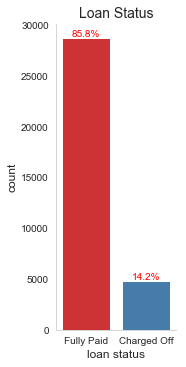

In [35]:
# let us see the distribution of loan status as this is one of the key factors for this analysis

plot = sns.catplot(x="loan_status", kind="count", data=loan, palette="Set1", aspect= .5);

plt.title('Loan Status', fontsize = 14)
plt.xlabel("loan status", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')
 
plt.show()

The above graph shows that in the data provided there are around 14.2% applicants who have defaulted/charged off

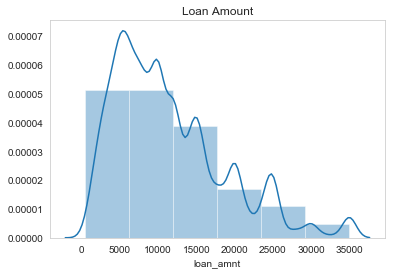

In [36]:
# let us see the distribution of loan amount 

plt.title('Loan Amount')
sns.distplot(loan['loan_amnt'], bins=6)
plt.show()

The graph above shows that the loan amount is majorly spread around say 6000 to 18000 approximately

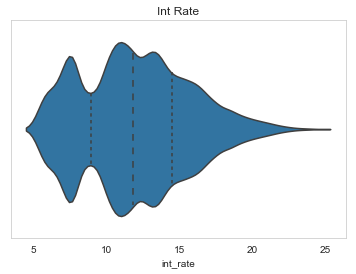

In [37]:
# let us see the distribution of interest rate

plt.title('Int Rate')
sns.violinplot(loan['int_rate'], inner='quartile')
plt.show()

The above graph shows that the interest rate is spread majorly between 8% and 14% approximately 

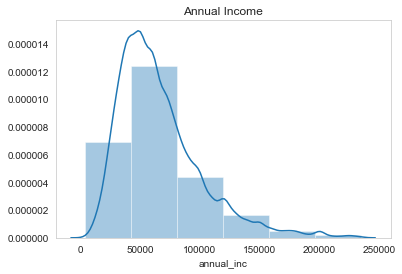

In [38]:
# let us see the distribution of Annual Income

plt.title('Annual Income')
sns.distplot(loan['annual_inc'],bins = 6)
plt.show()

As per the above graph, majority of the applicants have an annual income ranging approximately between 40000 USD to 90000 USD.

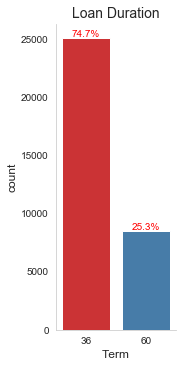

In [39]:
# let us analyse the loan duration

plot = sns.catplot(x="term", kind="count", data=loan, palette="Set1", aspect= .5);

plt.title('Loan Duration', fontsize = 14)
plt.xlabel("Term", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), color='red', ha='center', va='bottom')
  
plt.show()

As per the above graph, majority of the applicants have taken the loan duration as 36 months (74.7%)

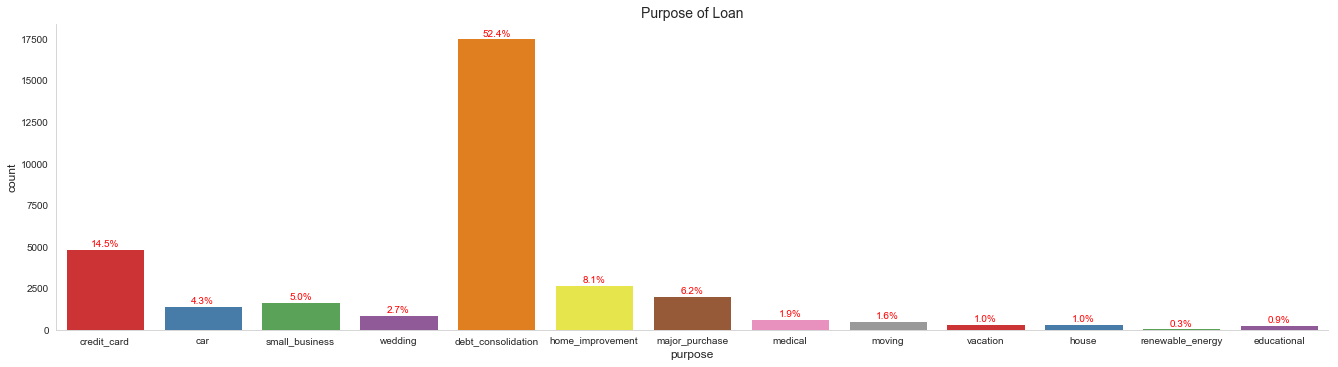

In [40]:
# Let us see the purposes and its spread for which the applicants have applied for loan

plot = sns.catplot(x="purpose", kind="count", data=loan, palette="Set1", aspect= 3.7);

plt.title('Purpose of Loan', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

The following are the purposes for which more than 5% applicants have taken loan

    - debt_consolidation - 52.4%
    - credit_card        - 14.5%
    - home_improvement   -  8.1%
    - major_purchase     -  6.2%
    - small business     -  5.0%

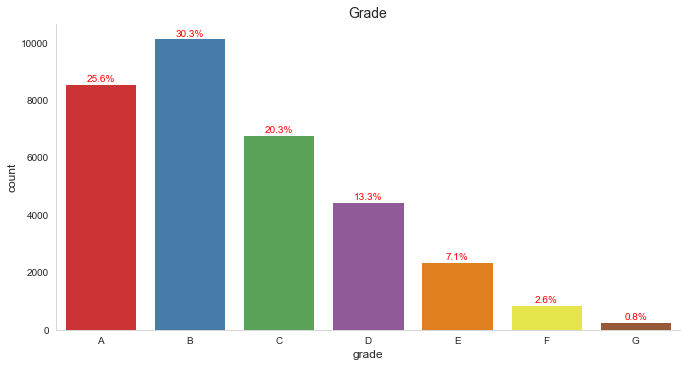

In [41]:
# Let us see how the loan application is spread across the grades

order_grade = ['A','B','C','D','E','F','G']
plot = sns.catplot(x="grade", kind="count", data=loan, palette="Set1", aspect= 1.9, order=order_grade);

plt.title('Grade', fontsize = 14)
plt.xlabel("grade", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

The above graph shows that most of the applicants fall under the grade B(30.3%), followed by A(25.6%) and C(20.3%)

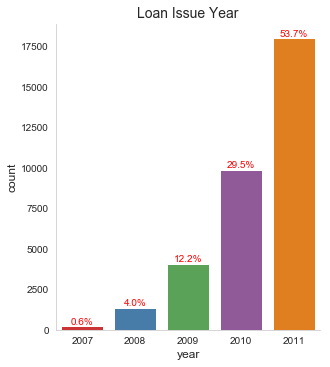

In [42]:
# Based on Year

plot = sns.catplot(x="issue_year", kind="count", data=loan, palette="Set1", aspect= .9);

plt.title('Loan Issue Year', fontsize = 14)
plt.xlabel("year", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

Per the above graph, applicants for loan increased as the years increased. In 2011 the number of applicants for loan was 53.7%. Since the variable issue year does not provide us any direction in the analysis, we would not be using this variable for any 
further analysis.

<b>Step 2 : Segmented Univariate Analysis - Let us see how the data is spread based on segmented columns<b>

In [43]:
# Various order categories which would be frequently used for ordering

order_category = ['Low','Medium','High','Very High']
order_emp_category = ['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level']
order_grade = ['A','B','C','D','E','F','G']
filtered_purpose_df = loan[(loan['purpose']=='debt_consolidation')
                           |(loan['purpose']=='credit_card')
                           |(loan['purpose']=='home_improvement')
                           |(loan['purpose']=='major_purchase')
                           |(loan['purpose']=='small_business')]

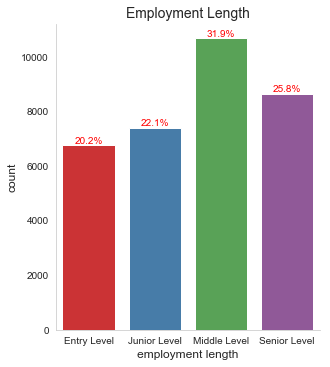

In [44]:
# Employment Length

plot = sns.catplot(x="categorised_emp_length", kind="count", data=loan, palette="Set1", aspect= 0.9, order = order_emp_category);

plt.title('Employment Length', fontsize = 14)
plt.xlabel("employment length", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

There are more number of loan applicants belonging to the middle level catgory (31.9%) i.e. between 4 to 8 years 

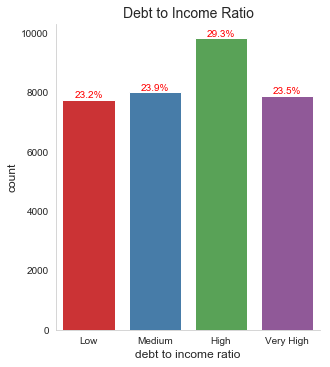

In [45]:
# debt to income ratio

plot = sns.catplot(x="categorised_dti", kind="count", data=loan, palette="Set1", aspect= .9, order=order_category);

plt.title('Debt to Income Ratio', fontsize = 14)
plt.xlabel("debt to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

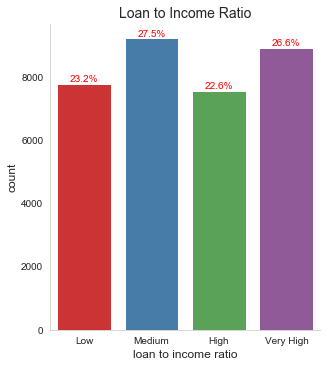

In [46]:
# based on loan to income ratio

plot = sns.catplot(x="categorised_loan_inc_ratio", kind="count", data=loan, palette="Set1", aspect= .9, order=order_category);

plt.title('Loan to Income Ratio', fontsize = 14)
plt.xlabel("loan to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

<b>Step 3 : Bivariate Analysis - Let us now analyse by comparing the loan status with various parameters<b>

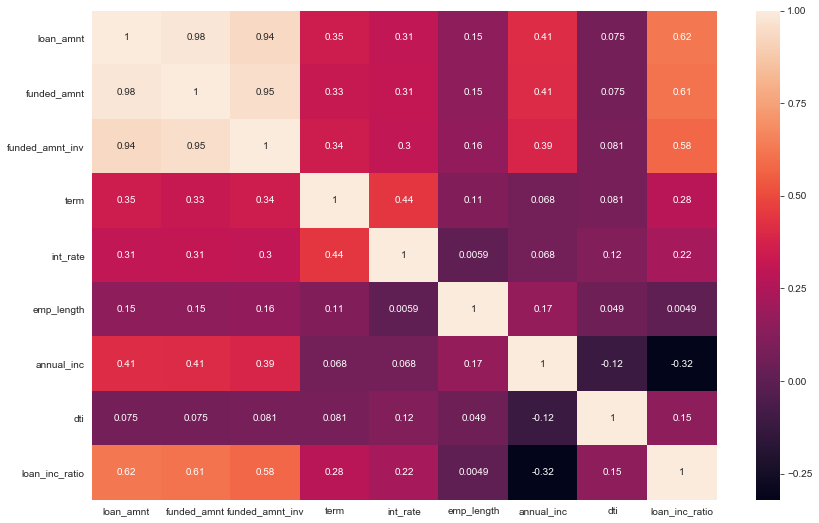

In [47]:
# Lets find the correlation among all the numeric fields in the data

loan_correlation = loan.corr()

f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

The above heat map shows that the loan_amount, funded_amount and funded_amount_inv are very closely correlated. Hence we can safely take 
any one of the fields from the above 3 fields for our analysis.

Therefore , we would be using the loan_amount field alone for our further analysis

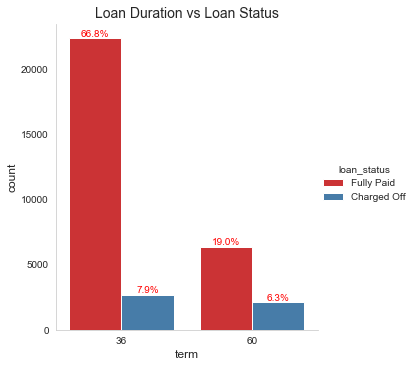

In [48]:
# Loan Duration Vs Loan Status

plot = sns.catplot(x="term", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= .9);

plt.title('Loan Duration vs Loan Status', fontsize = 14)
plt.xlabel("term", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()),
                color='red', ha='center', va='bottom')
  
plt.show()

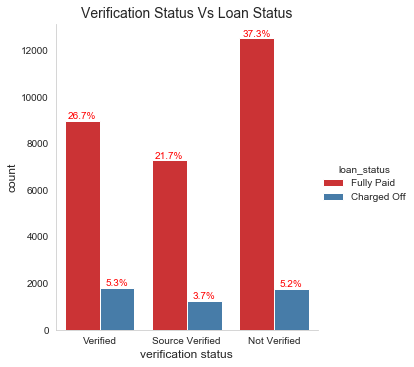

In [49]:
# Verification Status Vs Loan Status

plot = sns.catplot(x="verification_status", hue='loan_status',kind="count", data=loan, palette="Set1", aspect= .9);

plt.title('Verification Status Vs Loan Status', fontsize = 14)
plt.xlabel("verification status", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

Per the graph above, applicants whose income has been verified seem to default more. Hence we can ignore this as a cause for 
default for further analysis.

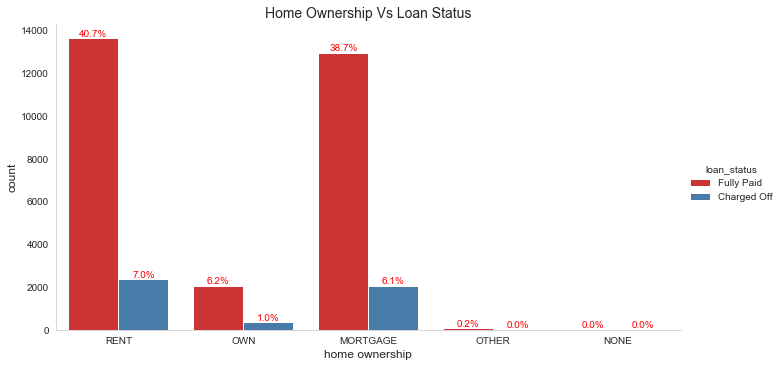

In [50]:
# Home Ownership Vs Loan Status

plot = sns.catplot(x="home_ownership", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.9);

plt.title('Home Ownership Vs Loan Status', fontsize = 14)
plt.xlabel("home ownership", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.annotate('{:1.1f}%'.format((height*100)/float(len(loan))), (p.get_x() + p.get_width()/2., height), 
                color='red', ha='center', va='bottom')

plt.show()

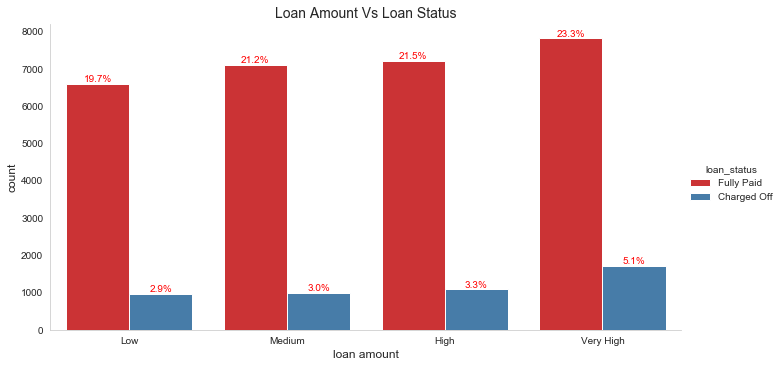

In [51]:
# Loan Amount Vs Loan Status

plot = sns.catplot(x="categorised_loan_amnt", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.9, 
                   order=order_category);

plt.title('Loan Amount Vs Loan Status', fontsize = 14)
plt.xlabel("loan amount", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

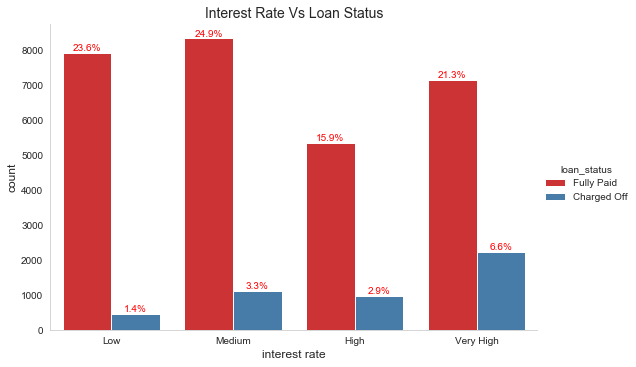

In [52]:
# Interest Rate Vs Loan Status

plot = sns.catplot(x="categorised_int_rate_perc", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.5, 
                   order=order_category);

plt.title('Interest Rate Vs Loan Status', fontsize = 14)
plt.xlabel("interest rate", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

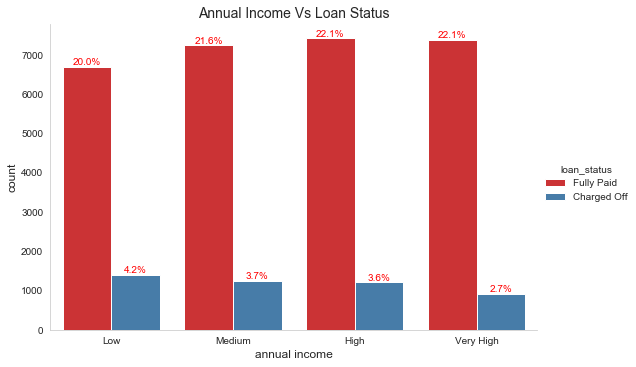

In [53]:
# Annual Income Vs Loan Status

plot = sns.catplot(x="categorised_annual_inc", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.5, 
                   order=order_category);

plt.title('Annual Income Vs Loan Status', fontsize = 14)
plt.xlabel("annual income", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

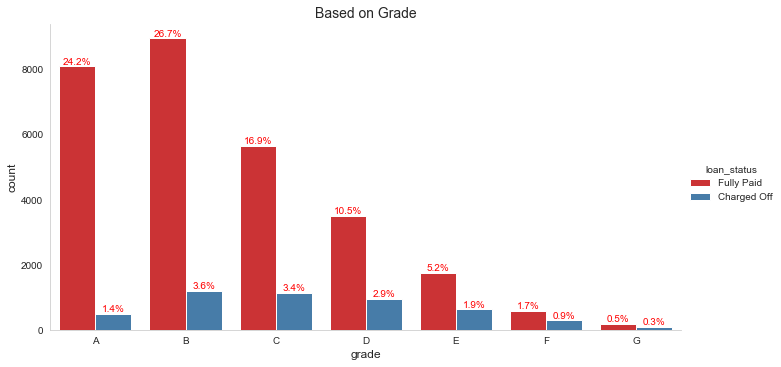

In [54]:
# Grade Vs Loan Status

plot = sns.catplot(x="grade", kind="count",hue='loan_status', data=loan, palette="Set1", aspect= 1.9, order=order_grade);

plt.title('Based on Grade', fontsize = 14)
plt.xlabel("grade", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

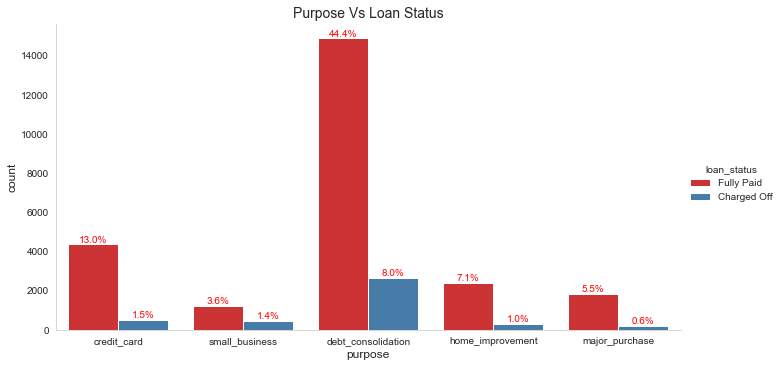

In [55]:
# Purpose Vs Loan Status

# Consider only the top 5 purpose for analysis which have already been filtered above
                           
plot = sns.catplot(x="purpose", hue = 'loan_status', kind="count", data=filtered_purpose_df, palette="Set1", aspect= 1.9);

plt.title('Purpose Vs Loan Status', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

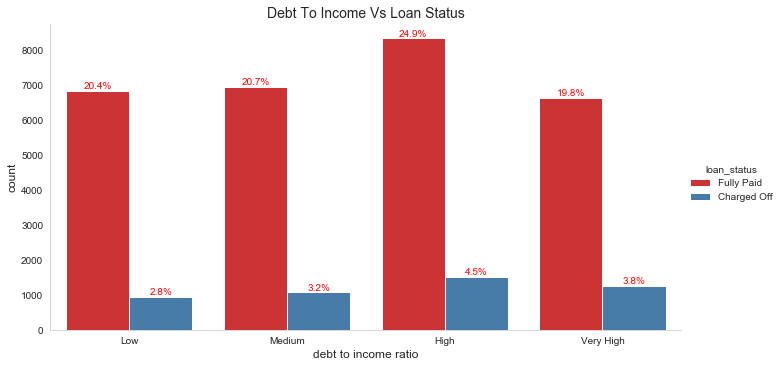

In [56]:
# Debt To Income Vs Loan Status

plot = sns.catplot(x="categorised_dti", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.9,
                   order=order_category);

plt.title('Debt To Income Vs Loan Status', fontsize = 14)
plt.xlabel("debt to income ratio", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
     ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

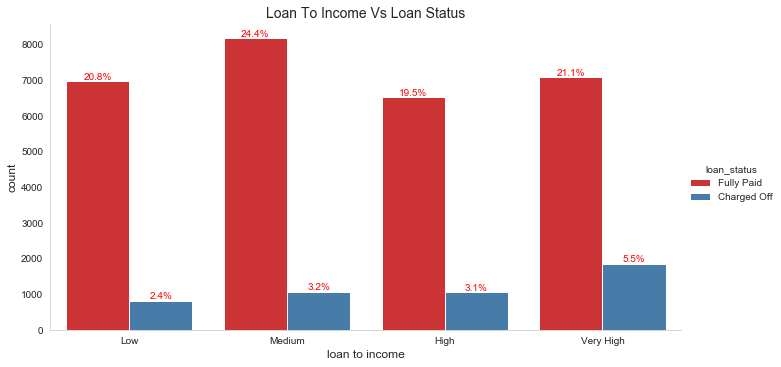

In [57]:
# Loan To Income Vs Loan Status

plot = sns.catplot(x="categorised_loan_inc_ratio", hue='loan_status', kind="count", data=loan, palette="Set1", aspect= 1.9, 
                   order=order_category);

plt.title('Loan To Income Vs Loan Status', fontsize = 14)
plt.xlabel("loan to income", fontsize = 12)
plt.ylabel("count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x() + p.get_width()/2., p.get_height()), 
                color='red', ha='center', va='bottom')

plt.show()

<b>Inference based on Step 3 Analysis :</b>
    
    - Applicants with a Loan Term of 36 months (7.9%)
    - In case of Home Ownership, applicants who stay in rented house default more (7.0%)
    - Applicants who have taken very high loan amount (>= 15000) default more (5.1%)
    - Applicants paying very high (>= 14%) interest rates default more (6.6%)
    - Loan applicants with low annual income (< 41000) tend to default more (4.2%)
    - Applicants identified as grade B tend to default more (3.6%) followed by C(3.4%) and D(2.9%) respectively.
    - Applicants with high debt to income ratio (between 13 and 18 - both inclusive) tend to default more (4.5%)
    - Applicants who have very high loan to income ratio (>= 25) default more (5.5%)
    - The default rate in terms of purpose of loan is as follows :
        - Debt Consolidation - 8.0%
        - Credit Card        - 1.5%
        - Small Business     - 1.4%
        - Home Improvement   - 1.0%
        - Major Purchase     - 0.6%

<b>Step 4: Analysis based on more than 2 columns<b>

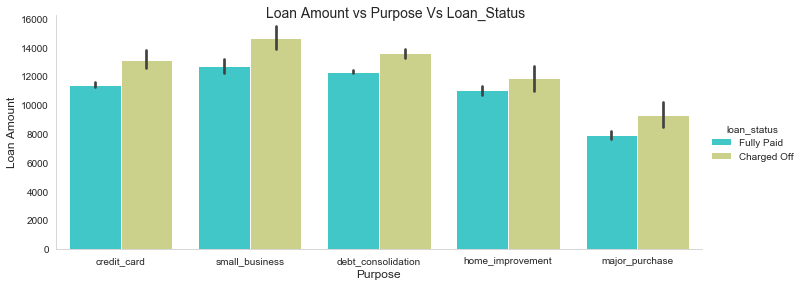

In [58]:
# loan status vs purpose vs loan amount

plot = sns.catplot(y="loan_amnt", x="purpose", hue ='loan_status', data=filtered_purpose_df, palette='rainbow', 
            kind="bar", height=4, aspect = 2.5);

plot.fig.suptitle('Loan Amount vs Purpose Vs Loan_Status', fontsize=14)
plot.set_xlabels('Purpose', fontsize=12)
plot.set_ylabels('Loan Amount', fontsize=12)
      
plt.show()

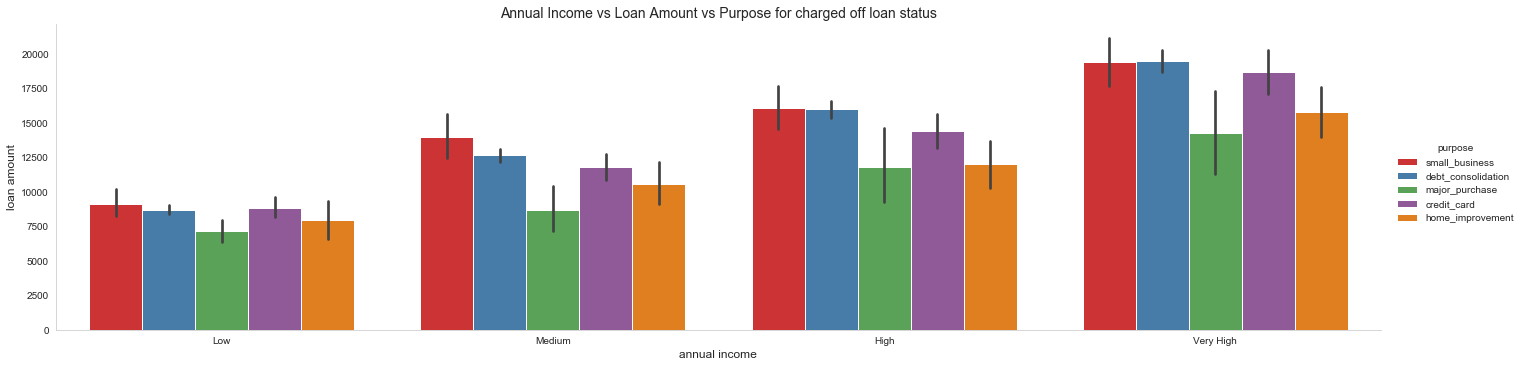

In [59]:
# Annual Income vs loan Amount vs Purpose for charged off loan Status


charged_off_filtered_purpose_df = filtered_purpose_df[(filtered_purpose_df['loan_status'] == 'Charged Off')]

plot = sns.catplot(x="categorised_annual_inc", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_category);

plt.title('Annual Income vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("annual income", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)

plt.show()

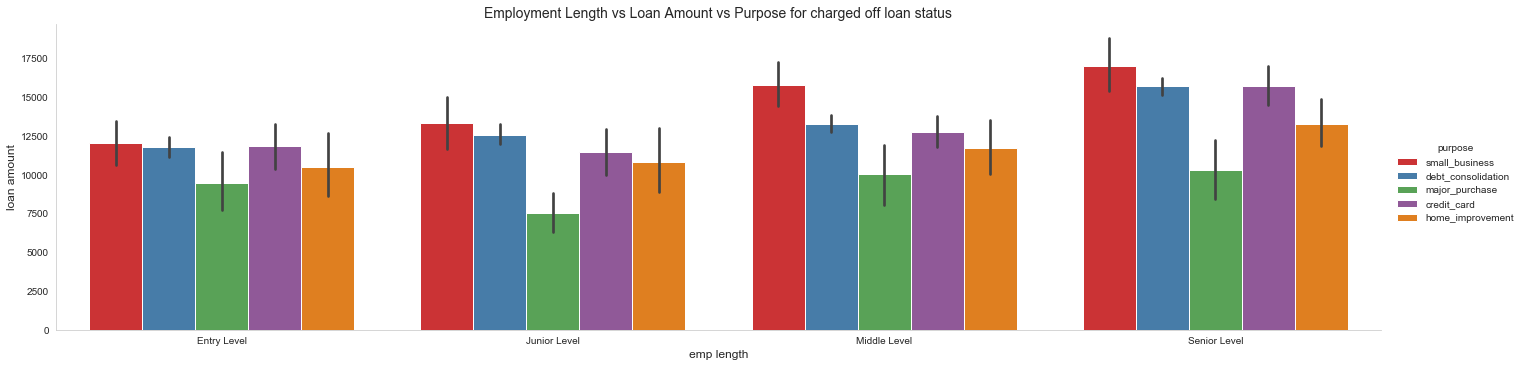

In [60]:
# Employment length vs loan Amount vs Purpose for charged off loan status

plot = sns.catplot(x="categorised_emp_length", y='loan_amnt', hue='purpose', kind="bar", data=charged_off_filtered_purpose_df,
                   palette="Set1", aspect= 3.9, order=order_emp_category);

plt.title('Employment Length vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("emp length", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)

# Print the counts
plt.show()

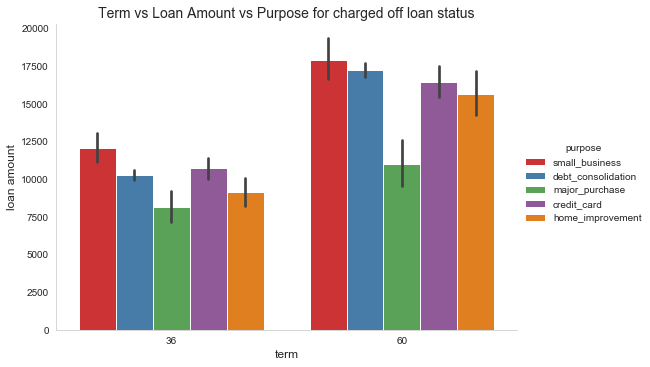

In [61]:
# Term vs loan Amount vs Purpose for charged off loan status

plot = sns.catplot(x="term", y="loan_amnt", hue='purpose', kind="bar", data=charged_off_filtered_purpose_df, palette="Set1", 
                   aspect= 1.5);

plt.title('Term vs Loan Amount vs Purpose for charged off loan status', fontsize = 14)
plt.xlabel("term", fontsize = 12)
plt.ylabel("loan amount", fontsize = 12)

# Print the counts
plt.show()

<b>Inference based on Step 4 Analysis :</b>
    
    - Applicants default more on loan taken for small business
    - Applicants whose annual income is in the category of Low, Medium and High have defaulted more on small business, where 
      as applicants whose annual income is categorised as Very High have defaulted more on loans taken for small business 
      and debt consolidation.
    - Irrespective of the employment length, those who have taken loan for small business have defaulted.
    - Applicants with a 60 month term duration for small business have defaulted more.
    
 Hence, we can infer that default rate is more for loans taken on small business followed by debt consolidation

<b>Step 5 : Let us analyse based on the chances of loan applicants defaulting in various parameters :</b>

The calculation can be done using the following formulae :

    Percentage Chance that the applicant will default = 100 *[(Number of Charged Off) / (Charged Off + Fully Paid)]

In [62]:
# User Defined Functions 
# function to change the width of the bar plot
# Inpur parametsrs are the ax and new value for the width of the bar

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
# function to plot the map
# Input values are the crosstab, Partial Title (Field Name to be displayed in the Title), 
#                      label to be displayed in x axis, the width size of the bar in the bar chart
        
def plot_map(crosstab, partialTitle, label_name, value) :
    
    linePlot = crosstab[['percentage_defaulted']]  
    barPlot =  crosstab[['Charged Off', 'Fully Paid']]

    ax = linePlot.plot(figsize=(20,8), marker='o', color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax, rot=1, secondary_y=True, stacked=True, figsize=(15,5))  

    ax.set_title(partialTitle +' vs Percentage Default', fontsize=14)
    ax.set_xlabel(label_name,fontsize=14)
    ax.set_ylabel('Percentage of Default', color = 'b', fontsize=13)
    ax2.set_ylabel('Number of Applicants', color = 'g', fontsize=13)

    change_width(ax2, value)
    plt.show()    

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
addr_state,,,,
AL,46,338,384,11.98
AR,21,187,208,10.10
AZ,99,616,715,13.85
CA,951,5103,6054,15.71
CO,80,600,680,11.76
CT,82,550,632,12.97
DC,13,184,197,6.60
FL,433,1958,2391,18.11
GA,179,1003,1182,15.14


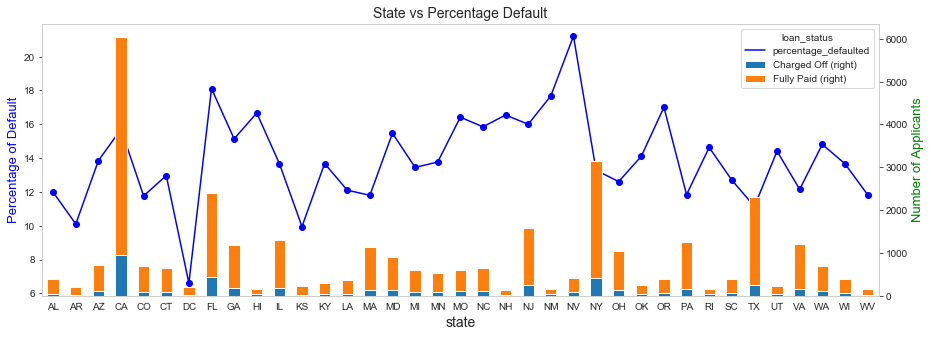

In [63]:
# Percentage of default rate in various states

# filter states such that we would only consider those states that have atleast 100 loan applicants in each states

filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 100)]
filter_states_df = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

# Create a cross tab function

filter_states_crosstab = pd.crosstab(filter_states_df['addr_state'], filter_states_df['loan_status'], margins=True)
filter_states_crosstab.drop(filter_states_crosstab.tail(1).index,inplace=True)
filter_states_crosstab['percentage_defaulted'] = round(100*((filter_states_crosstab['Charged Off']/filter_states_crosstab['All'])),2)
display(filter_states_crosstab)

# plot the map

plot_map(filter_states_crosstab, 'State', 'state', .50) 


The highest default rate is in the state of Nevada (NV) at 21.22%.Since there are multiple states that have high probability of default rate, we will nost consider this for our analysis.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
categorised_int_rate_perc,,,,
Medium,1106,8324,9430,11.73
Very High,2222,7144,9366,23.72
Low,465,7917,8382,5.55
High,975,5339,6314,15.44


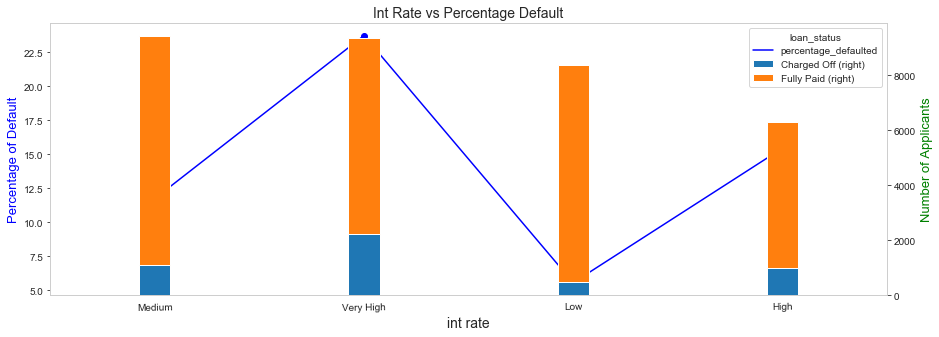

In [64]:
# Percentage default for int_rate

# sort categorised_int_rates based on custom sorting

int_rate_loan_df = loan
int_rate_loan_df.categorised_int_rate_perc = int_rate_loan_df.categorised_int_rate_perc.astype("category")
int_rate_loan_df.categorised_int_rate_perc.cat.set_categories(order_category, inplace=True)
int_rate_loan_df.sort_values(["categorised_int_rate_perc"])

# Create a cross tab function

int_rate_crosstab = pd.crosstab(int_rate_loan_df['categorised_int_rate_perc'], int_rate_loan_df['loan_status'], margins=True)
int_rate_crosstab.drop(int_rate_crosstab.tail(1).index,inplace=True)
int_rate_crosstab['percentage_defaulted'] = round(100*((int_rate_crosstab['Charged Off']/int_rate_crosstab['All'])),2)
display(int_rate_crosstab)

# plot the map

plot_map(int_rate_crosstab, 'Int Rate', 'int rate', .15)  

Applicants who have taken a very high interest (>= 14%) rates are bound to default.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
purpose,,,,
credit_card,506,4356,4862,10.41
debt_consolidation,2665,14875,17540,15.19
home_improvement,321,2386,2707,11.86
major_purchase,209,1851,2060,10.15
small_business,459,1222,1681,27.31


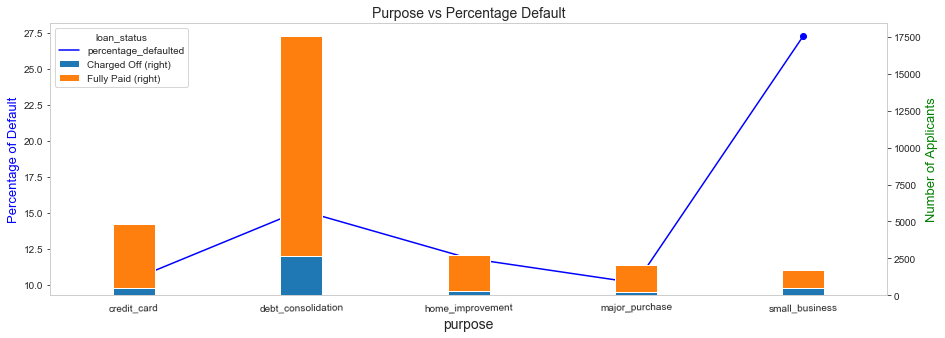

In [65]:
# Percentage default for Purpose

purpose_loan_df = loan[(loan['purpose']=='debt_consolidation')
                        |(loan['purpose']=='credit_card')
                        |(loan['purpose']=='home_improvement')
                        |(loan['purpose']=='major_purchase')
                        |(loan['purpose']=='small_business')]

# Create a cross tab function

purposecrosstab = pd.crosstab(purpose_loan_df['purpose'], purpose_loan_df['loan_status'], margins=True)
purposecrosstab.drop(purposecrosstab.tail(1).index,inplace=True)
purposecrosstab['percentage_defaulted'] = round(100*((purposecrosstab['Charged Off']/purposecrosstab['All'])),2)
display(purposecrosstab)

# plot the map

plot_map(purposecrosstab, 'Purpose', 'purpose', .25)  

Applicants who have taken loan for small business (27.31%) tend to default more.

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
grade,,,,
A,481,8101,8582,5.60
B,1194,8959,10153,11.76
C,1126,5665,6791,16.58
D,961,3500,4461,21.54
E,628,1741,2369,26.51
F,287,578,865,33.18
G,91,180,271,33.58


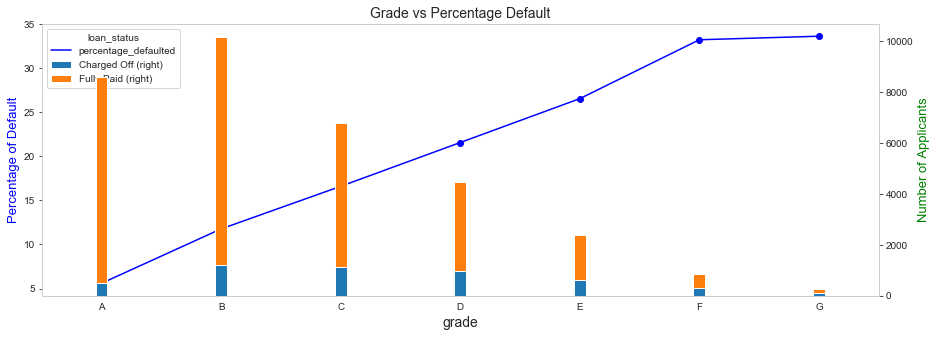

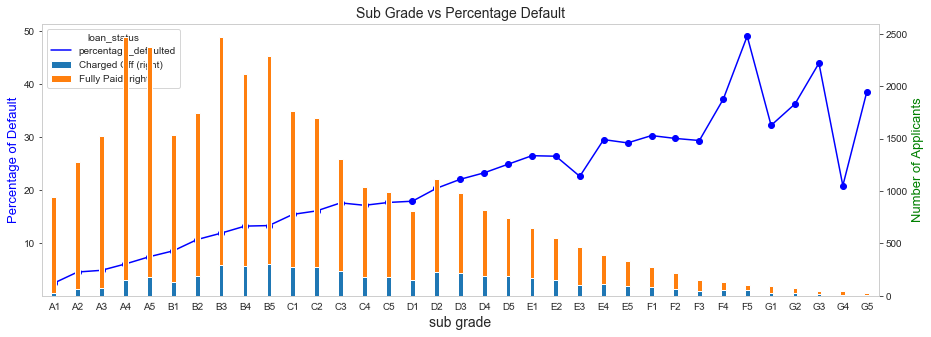

In [66]:
# Percentage default for Grade

# sort grade based on custom sorting

grade_df = loan
grade_df.sort_values(["grade"])

sub_grade_df = loan
sub_grade_df.sort_values(["sub_grade"])

# Create a cross tab function

grade_crosstab = pd.crosstab(grade_df['grade'], grade_df['loan_status'], margins=True)
grade_crosstab.drop(grade_crosstab.tail(1).index,inplace=True)
grade_crosstab['percentage_defaulted'] = round(100*((grade_crosstab['Charged Off']/grade_crosstab['All'])),2)
display(grade_crosstab)

sub_grade_cross_tab = pd.crosstab(grade_df['sub_grade'], sub_grade_df['loan_status'], margins=True)
sub_grade_cross_tab.drop(sub_grade_cross_tab.tail(1).index,inplace=True)
sub_grade_cross_tab['percentage_defaulted'] = round(100*((sub_grade_cross_tab['Charged Off']/sub_grade_cross_tab['All'])),2)

# plot the map

plot_map(grade_crosstab, 'Grade', 'grade', .10)
plot_map(sub_grade_cross_tab, 'Sub Grade', 'sub grade', .20)

From the above graph, it can be observed that the probability that the applicant would default increases from grade A to G

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
categorised_annual_inc,,,,
Low,1406,6686,8092,17.38
Medium,1247,7239,8486,14.69
High,1208,7414,8622,14.01
Very High,907,7385,8292,10.94


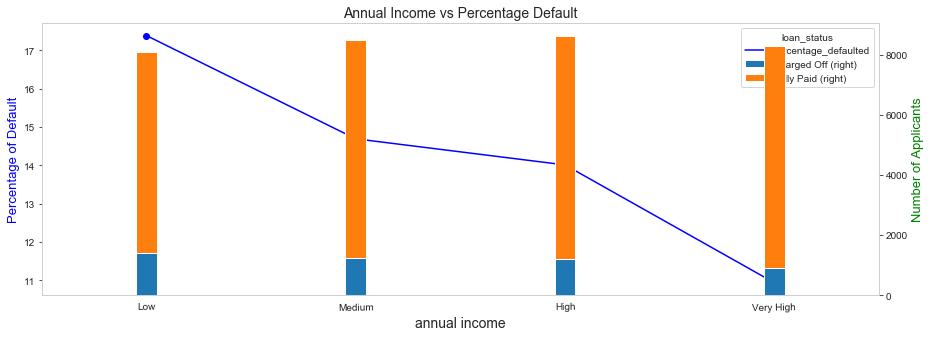

In [67]:
# Percentage default for Annual Income

# sort categorised_annual_inc based on custom sorting

annual_inc_df = loan
annual_inc_df.categorised_annual_inc = annual_inc_df.categorised_annual_inc.astype("category")
annual_inc_df.categorised_annual_inc.cat.set_categories(order_category, inplace=True)
annual_inc_df.sort_values(["categorised_annual_inc"])

# Create a cross tab function

annual_inc_crosstab = pd.crosstab(annual_inc_df['categorised_annual_inc'], annual_inc_df['loan_status'], margins=True)
annual_inc_crosstab.drop(annual_inc_crosstab.tail(1).index,inplace=True)
annual_inc_crosstab['percentage_defaulted'] = round(100*((annual_inc_crosstab['Charged Off']/annual_inc_crosstab['All'])),2)
display(annual_inc_crosstab)

# plot the map

plot_map(annual_inc_crosstab, 'Annual Income', 'annual income', .10)

Applicants with low income (17.38%) tend to default more. 

loan_status,Charged Off,Fully Paid,All,percentage_defaulted
emp_length,,,,
0,561,3408,3969,14.13
1,400,2389,2789,14.34
2,485,3321,3806,12.74
3,489,3115,3604,13.57
4,406,2600,3006,13.51
5,414,2458,2872,14.42
6,276,1696,1972,14.00
7,235,1303,1538,15.28
8,184,1108,1292,14.24


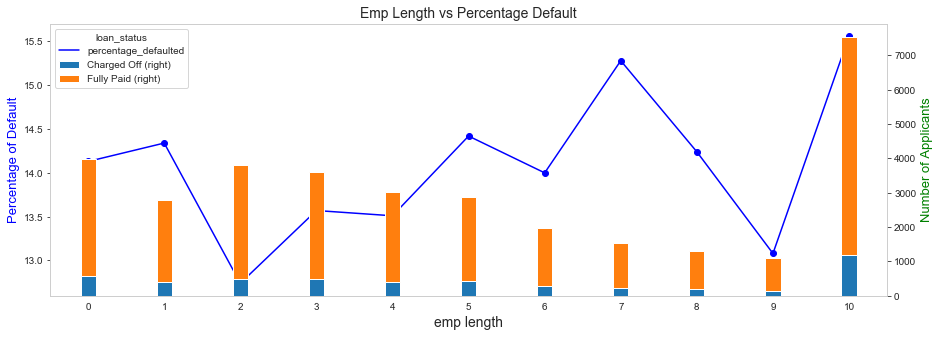

In [68]:
# Percentage default for Employment length

# Create a cross tab function

emp_length_crosstab = pd.crosstab(loan['emp_length'], loan['loan_status'], margins=True)
emp_length_crosstab.drop(emp_length_crosstab.tail(1).index,inplace=True)
emp_length_crosstab['percentage_defaulted'] = round(100*((emp_length_crosstab['Charged Off']/emp_length_crosstab['All'])),2)
display(emp_length_crosstab)

# plot the map

plot_map(emp_length_crosstab, 'Emp Length', 'emp length', .20)

Applicants with a tenure of around 2 to 4 years are a safe bet for giving loans as they do not seem to be defaulting much

<b> Analysis Conclusion : </b>
   
    1. Following are the main parameters, taken into consideration for arriving at the analysis conclusion
        - Interest Rate
        - Purpose
        - Grade
        - Term
        - Emp Length
        - Annual Income
        
    2. As per the analysis, it can be inferred that applicants who are of low income group and have taken a high 
       interest loan with longer duration for small business have more probability of defaulting. 
       Hence extra care should be taken before lending them loans.      
   